In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten,Conv2D,MaxPooling2D,Dropout,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array , load_img

In [15]:
base_path = '/content/drive/MyDrive/dataset'
train_path = '/content/drive/MyDrive/dataset/train'
test_path = '/content/drive/MyDrive/dataset/test'

In [16]:
image_gen = ImageDataGenerator(rotation_range=30,width_shift_range=0.1,height_shift_range=0.1,rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [19]:
IMG_SHAPE = (128,128,3)

In [20]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')
# Freezing the Base Model
base_model.trainable = False
#Define our Custom Head
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
prediction_layer = tf.keras.layers.Dense(1,activation='sigmoid')(global_average_layer)
# Define the Model
model = tf.keras.models.Model(inputs=base_model.input,outputs=prediction_layer)

9412608/9406464 [==============================] - 0s 0us/step


In [21]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 64, 64, 32)   0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [23]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory(train_path,target_size=input_shape[:2],batch_size=batch_size,class_mode='binary')

Found 417 images belonging to 2 classes.


In [24]:
test_image_gen = image_gen.flow_from_directory(test_path,target_size=input_shape[:2],batch_size=batch_size,class_mode='binary')

Found 38 images belonging to 2 classes.


In [25]:
train_image_gen.class_indices

{'Bulling': 0, 'NoBulling': 1}

In [26]:
result = model.fit_generator(train_image_gen,epochs=10,steps_per_epoch=20,validation_data=test_image_gen,validation_steps=12)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
20/20 [==============================] - 8s 295ms/step - loss: 0.8762 - accuracy: 0.4186 - val_loss: 0.6265 - val_accuracy: 0.5789
Epoch 2/10
20/20 [==============================] - 4s 222ms/step - loss: 0.6254 - accuracy: 0.6776
Epoch 3/10
20/20 [==============================] - 5s 238ms/step - loss: 0.5235 - accuracy: 0.7291
Epoch 4/10
20/20 [==============================] - 4s 217ms/step - loss: 0.4745 - accuracy: 0.7731
Epoch 5/10
20/20 [==============================] - 4s 212ms/step - loss: 0.4307 - accuracy: 0.7916
Epoch 6/10
20/20 [==============================] - 4s 222ms/step - loss: 0.3957 - accuracy: 0.8240
Epoch 7/10
20/20 [==============================] - 4s 216ms/step - loss: 0.3596 - accuracy: 0.8476
Epoch 8/10
20/20 [==============================] - 5s 228ms/step - loss: 0.3368 - accuracy: 0.8700
Epoch 9/10
20/20 [==============================] - 4s 209ms/step - loss: 0.3467 - accuracy: 0.8367
Epoch 10/10
20/20 [==============================] - 5s 24

In [27]:
model.save('BvsNo_10epoch_85_acc_model.h5')

In [28]:
model.evaluate(test_image_gen)

3/3 [==============================] - 1s 165ms/step - loss: 0.3247 - accuracy: 0.8684


[0.32473325729370117, 0.8684210777282715]

In [35]:
def pred_clean(pred):
  if pred > 0.5:
    return 1
  else:
    return 0

def pred_class(pred):
  res = pred_clean(pred)
  labels = ['Bulling','No Bulling']
  return labels[res]

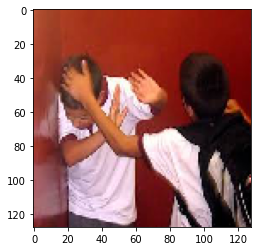

In [45]:
img_file = '/content/drive/MyDrive/dataset/test/Bulling/image17.jpeg'
image = load_img(img_file,target_size=(128,128))
plt.imshow(image)
image = img_to_array(image)
image = np.expand_dims(image,axis=0)
image = image / 255

In [30]:
res = model.predict(image)

In [46]:
pred = pred_class(res)

In [47]:
pred

'Bulling'